# `Matplotlib`

This lesson aims to review some key elements of the plotting package Matplotlib, used widely in astronomy.

### `matplotlib.pyplot`

`matplotlib.pyplot` is a complete graphics module often used by Python developers. Check out [this gallery](https://matplotlib.org/gallery.html) to understand what you can do with pyplot.

This is by no means a comprehensive tutorial, but it will point out a few important things about `matplotlib.pyplot` objects and give advice about incorporating plotting functionality in your open-source astronomy software. There are other (excellent) plotting tools in astronomy, like Plotly, and Bokeh, but we will only discuss `matplotlib.pyplot` here.


It is used widely in the astronomy community. For example, the first image of a black hole were made using a matplotlib code.

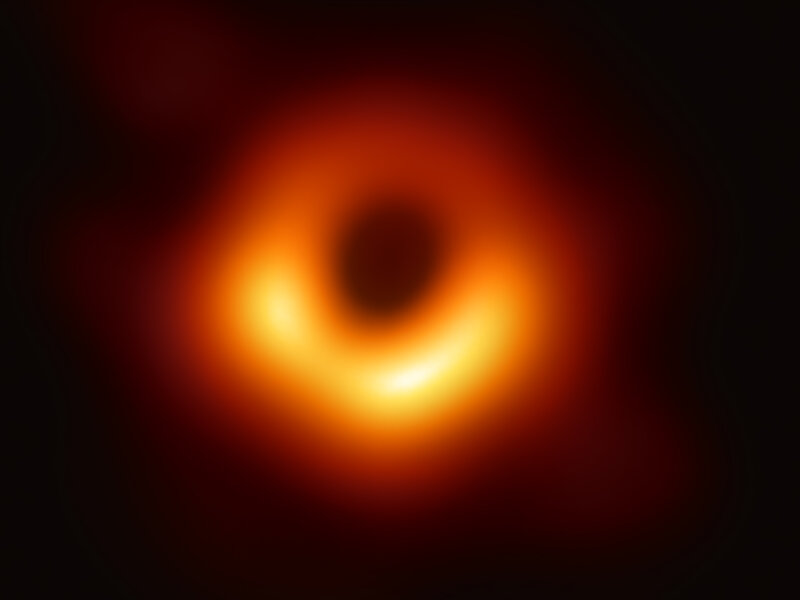


---- 

`matplotlib.pyplot` relies on the **changing state** concept. The **state** of a programming environment is what determines the program's behavior. For example, when you type:

``` >> import orbitize```

You are modifying your environment's state. 




Before you typed ```import orbitize```, if you tried to run something like ```orbitize.plot.OrbitPlot()```, you would get an import error. However, in running the import command, you modified the state of your environment, and when you try ```orbitize.plot.OrbitPlot()```, you'll get something totally different! 


Nothing about the ```orbitize.plot.OrbitPlot()``` code changed, but because your environment's **state** changed, the output also changed.

A final excellent example of this concept as it applies to matplotlib is the `matplotlib.rcParams` object, which is like a dictionary that controls the default behaviors of matplotlib plots. When you type:

```>> import matplotlib```

The `matplotlib.rcParams` object is automatically defined with default values. This is how, for example, matplotlib knows how large to make fonts and figures. 

It also means that you can control the default behavior of matplotlib plots by updating the state via the `update()` method.

-----
Well, too many words...

![](imgs/import_plt.jpeg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   


The basic "unit" of `matplotlib.pyplot` is [the `Figure` object](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), which acts as a container for all the other plot elements. Take a look at this example figure from Matplotlib v1.5.1 FAQs

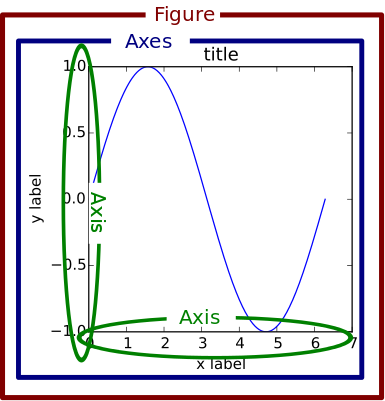 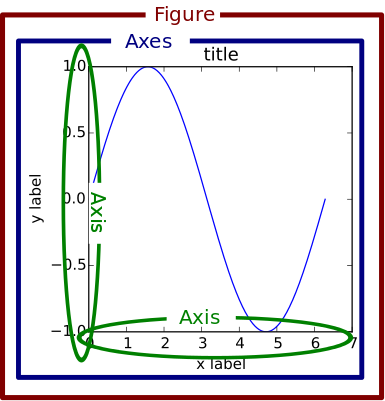

We will also encounter the `Axes` object. `Axes` is the region inside the figure where you will have your plots

This is a useful figure to refer (From Matploltib v1.5.1 FAQs):
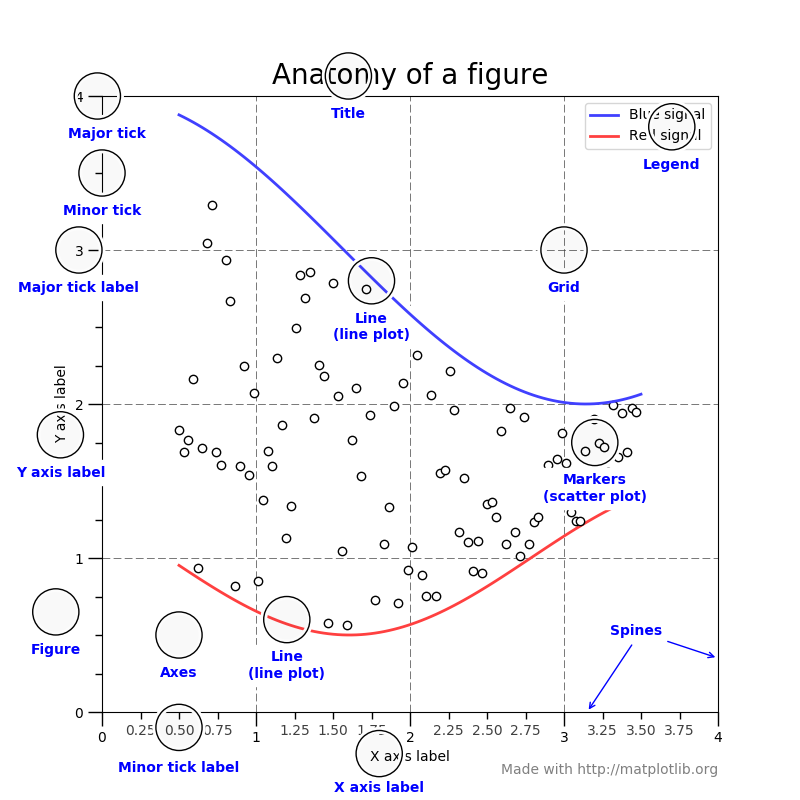

### Let's start with a simple figure

<class 'matplotlib.figure.Figure'>


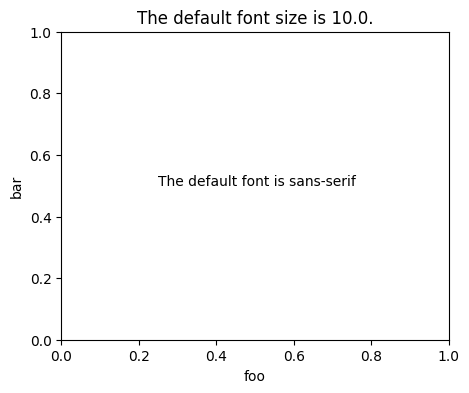

In [3]:
### make a plot
fig = plt.figure(figsize=(5,4)) #control the figure size here 
#this is the figure object

print(type(fig))
plt.title('The default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo')
plt.ylabel('bar')
plt.text(0.25,0.5,'The default font is {}'.format(rcParams['font.family'][0])) #adding a text 
plt.show()


You can create subplots using `plt.subplots`

<Figure size 640x480 with 0 Axes>

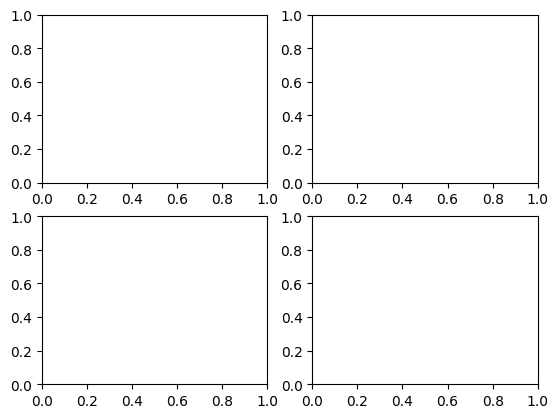

In [4]:
fig = plt.figure()  # an empty figure with no axes
fig, axes = plt.subplots(nrows=2, ncols=2)  # a figure with a 2x2 grid of Axes
#another way defining the figure objects plus the axes object

#guess the output
#print(type(axes))
#print(type(axes[0,0]))

We can change the way the plot looks by changing its style using `plt.style`

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
plt.style.use('classic') # to use the style. We are changing the state here too

We'll start by using the `update()` method of `matplotlib.rcParams` to change the default font size and the [overall style](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).


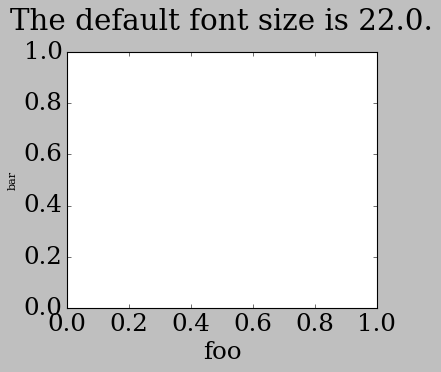

In [7]:
### update the current state. 
### This command doesn't have any output! 
rcParams.update({'font.size': 22})
rcParams.update({'font.family':'serif'})

# make another plot
plt.figure(figsize=(5,4))
#plt.title('The default font size is {}.'.format(rcParams['font.size']))
plt.title('The default font size is {}.'.format(rcParams['font.size']),pad=20) #title padding
#plt.title('The default font size is {}.'.format(rcParams['font.size']),fontsize=10)
plt.xlabel('foo')
plt.ylabel('bar',fontsize=10)
plt.show()

As you can see, `matplotlib` decides on a default font size by checking the *current* value of the state parameter `rcParams['font.size']`, but this is always overwritten if you pass in a keyword (in this case, the font size of the y axis label).

You can modify several other parameters, as for example the default colors, linestyle, figure size, etc. 

Check [the documentation here](https://matplotlib.org/stable/tutorials/introductory/customizing.html) for more details.

----

In [8]:
plt.style.use('default') #change back to default

In [9]:
# we can define a dictonary of params we want to change

params = {
   'axes.labelsize': 10,
   'font.size': 20,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'figure.figsize': [4.5, 4.5],
   'font.family':'serif',
   'axes.labelsize':15
   }
rcParams.update(params)

A matplotlib `Figure` relies on the same **state** idea.

The current figure changes (i.e. the *state* is updated) when you initialize a new `Figure` object. Unless you specify a particular `Figure` object, `plt.___()` functions will always add to the current `Figure` object. That is a nice feature-- it makes it easy to add multiple types of plots onto the same figure.

(-1.0, 1.0)

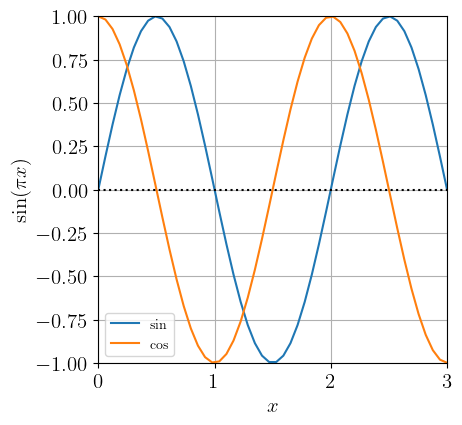

In [10]:
x = np.linspace(0,3)
plt.plot(x,np.sin(x*np.pi),label="sin") 
plt.plot(x,np.cos(x*np.pi),label="cos") # this was the previous figure 
plt.xlabel("$x$")
plt.ylabel("$\sin(\pi x)$") # using TeX here
plt.axhline(y=0,color="black",linestyle="dotted") #horizontal line
plt.grid() #grids!
plt.xlim(0,3)
plt.legend()
plt.ylim(-1,1)

We have already seen a little glimpse of another kind of object: [the `Axes` object](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). These objects are containers for all the plot elements *in a particular figure panel*. `Axes` are attributes of `Figure` objects. We will use `plt.subplots` to define the number of "subplots" inside your image. Let's see this in action in a figure with 1 row and 2 columns.

fig type: <class 'matplotlib.figure.Figure'>
ax type: <class 'numpy.ndarray'>
ax[0] type: <class 'matplotlib.axes._axes.Axes'>


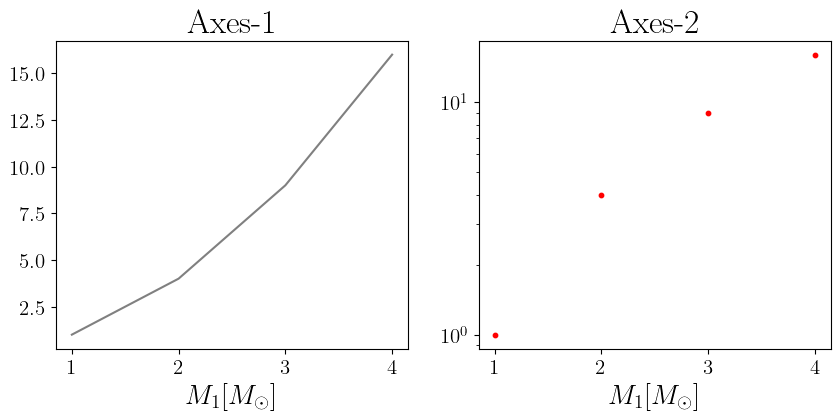

In [13]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
y_error = np.array([5, 1.2, 2, 5]) #let's also have an error bar

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

print('fig type: {}'.format(type(fig)))
print('ax type: {}'.format(type(ax)))
print('ax[0] type: {}'.format(type(ax[0])))

ax[0].plot(x, y, color='grey')
ax[0].set_title("Axes-1")
ax[0].set_xlabel("$M_1 [M_{\odot}]$",fontsize=20) #this is overriding the rcparams

ax[1].scatter(x,y,color="red",s=10)
ax[1].set_title("Axes-2")
ax[1].set_xlabel("$M_1 [M_{\odot}]$",fontsize=20) 
ax[1].set_yscale('log') #change the y-axis scale to a log scale
plt.show()

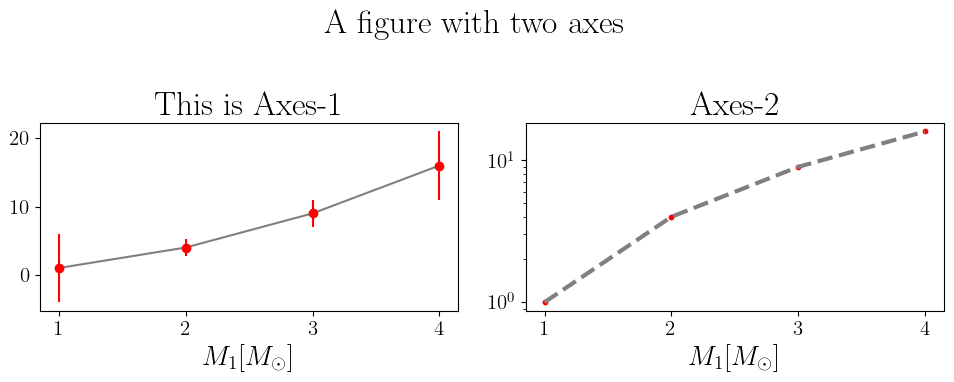

In [14]:
fig.suptitle("A figure with two axes")
ax[0].set_title("This is Axes-1")

ax[0].errorbar(x,y,yerr=y_error,color="r",fmt="o") #adding an error 
ax[1].plot(x, y, color='grey',linewidth=3,linestyle="--") #adding a line

fig.tight_layout() # prettify
fig 

#can we update the linestyle ?

#ax[1].plot(x, y, color='grey',linewidth=3,linestyle="-.") 

fig

When we update the existing figure notice how the lines are overplotted to the previous plot and the linestyle doesn't look changed ? How do I update the axis such that the line is at the bottom ? We can actually clear the contents of that particular axis using `Axes.cla()`

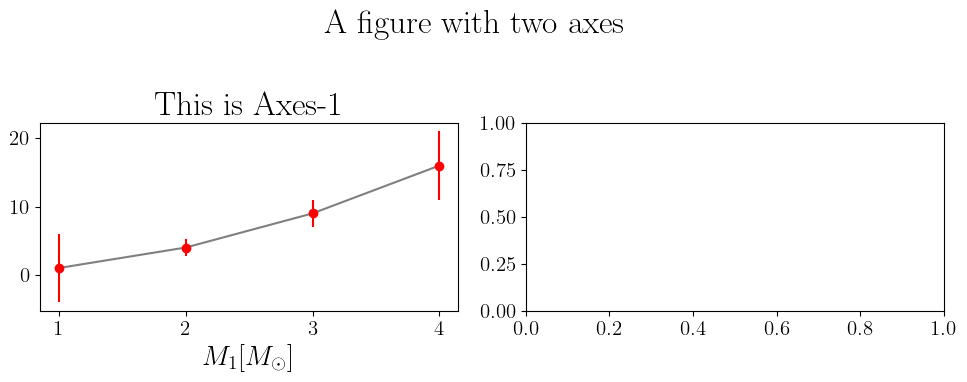

In [15]:
ax[1].cla()
fig

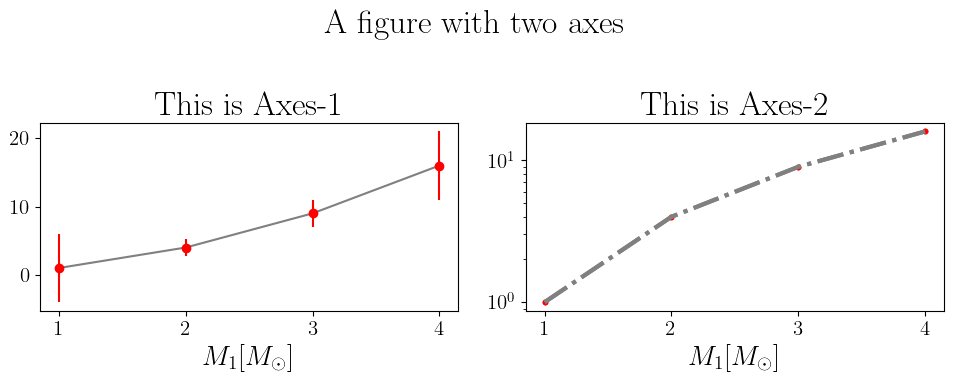

In [17]:
ax[1].plot(x, y, color='grey',linewidth=3,linestyle="-.")
ax[1].scatter(x,y,color="red",s=10)
ax[1].set_yscale('log') #changing y axis to a log scale
ax[1].set_title("This is Axes-2")
ax[1].set_xlabel("$M_1 [M_{\odot}]$",fontsize=20) 
fig

Similarly, there are other useful methods to keep in mind like `plt.gca()` ,`plt.gcf()`,and `plt.sca()` (get/set current `Axes`). Let's see how they work:

`plt.gcf()`: Get the current figure

`plt.gca()`: Get the current axis

`plt.sca()`: Set the current axis

In [151]:
color_palette = ["#e1a852","#bf582b","#9d7539","#5a4320"] #Let's define some colors using HEX code

Text(0.5, 0.6, 'Great! :D')

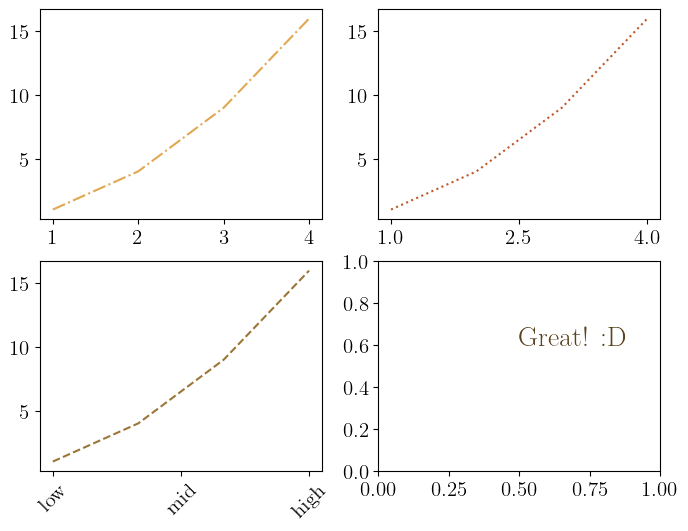

In [152]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax[0,0].plot(x, y, color=color_palette[0],ls='-.')
ax[0,1].plot(x, y,color=color_palette[1], ls=':')
ax[0,1].set_xticks([1,2.5,4])
ax[1,0].plot(x, y, color=color_palette[2], ls='--')
ax[1,0].set_xticks([1,2.5,4], labels=['low','mid','high'], rotation=45)
ax[1,1].text(0.5,0.6,'Great! :D',color=color_palette[3])

`sca()` helps us set the axes and plot and can be helpful if you are plotting things over a for loop

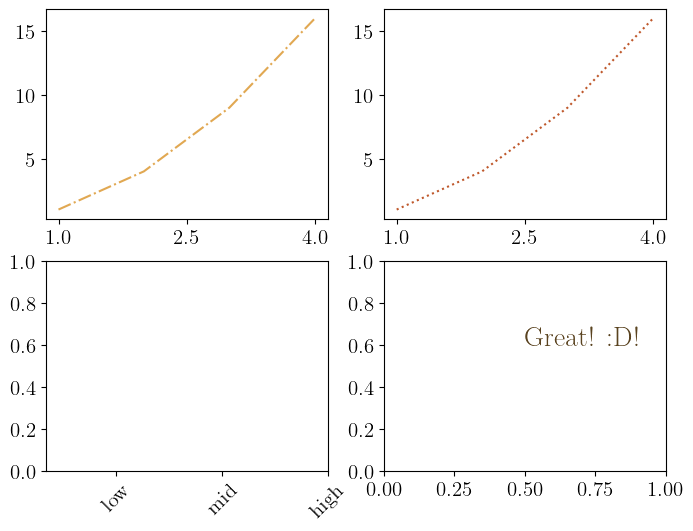

In [153]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

axs = ax.flatten()
linestyle_array = ['-.',':','--','-']

for i in range(len(axs)):
    plt.sca(axs[i])        # set current Axes
    
    if(i==2):
        plt.xticks([1,2.5,4], labels=['low','mid','high'], rotation=45)

    elif(i==3):
        plt.text(0.5,0.6,'Great! :D!',color=color_palette[3])
    
    else:
        plt.plot(x, y,color=color_palette[i],ls=linestyle_array[i]) # acts on current Axes
        plt.xticks([1,2.5,4])


We can also call the axes from the `Figure` object using `Figure.axes`

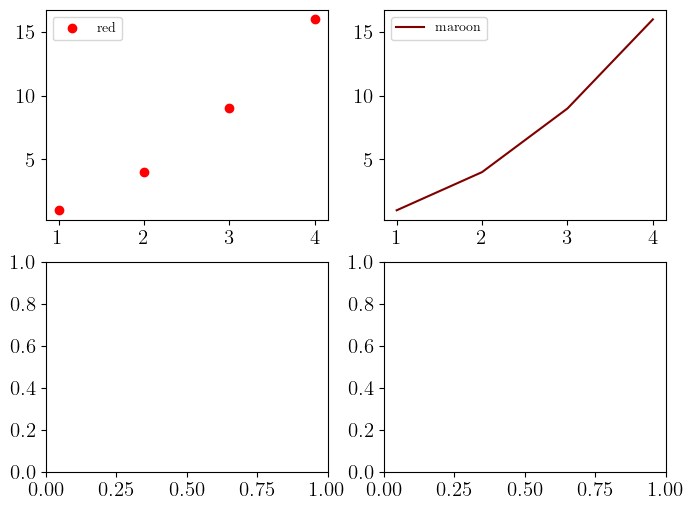

In [154]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
fig.axes[0].scatter(x, y, color='red', label='red') #label is for the legend
fig.axes[0].legend()

fig.axes[1].plot(x, y, color='maroon', label='maroon')
fig.axes[1].legend()

`plt.gca()` is used to get the current active axis.
`plt.gcf()` gets the current active figure. You can read more about them [here](https://matplotlib.org/3.1.1/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py).

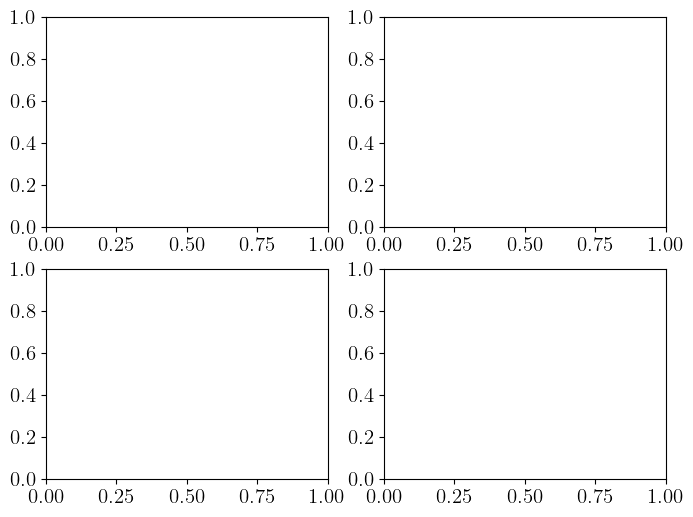

In [155]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

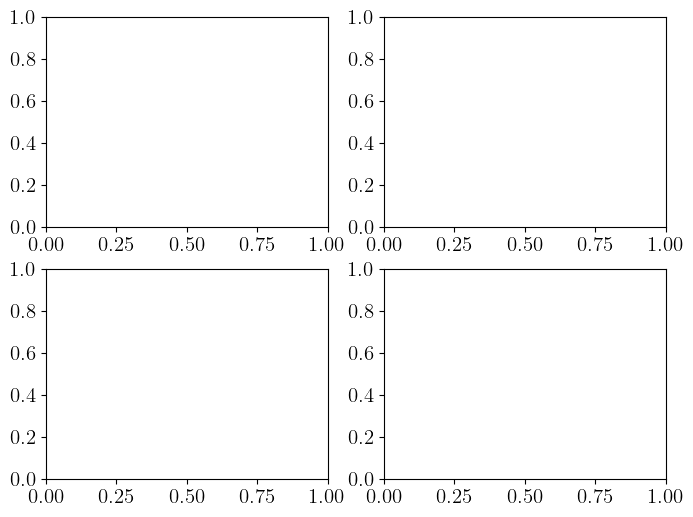

In [170]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
mystery_axis = plt.gca()

#Guess the mystery axis


#mystery_axis.scatter(x, y, color='r', label='red')# acts on `mystery_axis`
#mystery_axis.legend(loc='lower right') 
#mystery_axis.set_title("I'm the mystery axis")



#similarly gcf gives you the current figure
#mystery_figure = plt.gcf()

------

We can use `matplotlib.pyplot` to visualize 2D arrays, which means any image. 

For this, we can use `plt.imshow()`, which allows us to change many parameters. You can find the [documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).


In [175]:
magic_image = np.loadtxt('data/magic_image.txt')
### A basic plot will look like this
plt.figure(figsize=(4,4))
plt.imshow(magic_image)

# you can change colorbar
#plt.imshow(magic_image,cmap="Greys")
plt.colorbar()
plt.show()

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

We can make several changes. For this case we will take the axes off, change the colormap and save in different formats.


To asign colors you can create your own maps, but there are [several good ones here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

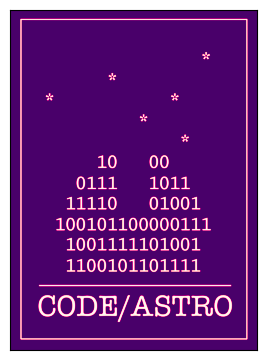

In [141]:
plt.figure(figsize=(4,4))
plt.imshow(magic_image, cmap='RdPu_r')

### We can eliminate the ticks too
plt.xticks([]),plt.yticks([])

### Avoid cutting labels.
plt.tight_layout() 

### save your plot
### you can define the format. 
#file_name = 'logo_codeastro' # The extentions can be png, pdf, ps, eps, and svg
#plt.savefig(file_name+'.png', dpi=None) # dpi sets the resolution in dots per inch.

plt.show()

-----

### General tips:

- **Don't overengineer your plotting code.** 

You don't need to add a million keywords anticipating every possible tweak your users might wish to make. 

Focus on making it easy for your users to modify the code themselves. 

Make sure you return `Figure` and `Axes` objects (more on this below) to your user so they can easily modify plots.


- **Apply principles of good design.** 

Use color palettes with lots of contrast, make your fonts large and easy-to-read, and make sure your plots are colorblind friendly. (There are several great colorblindness simulators out there, for example [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/).) 

It's also good to differentiate plot elements in more than one way (ex: one line is black and dashed, another is red and solid). 

------
#### `Activity #1`

Let's practice working with `Figure` and `Axes` objects. 

Run the code snippet below to generate some orbits and plot them using `orbitize!`

This code uses random sampling of a probability distribution to generate orbits consistent with data of a planet's position over time. 

Notice that the last line of this snippet returns the `Figure` object used to make the plot. This is good practice-- it lets your users more easily customize figures, just as you're about to do!

Tasks:
- Change the x-axis limits of the top right panel to 2011-2015.

- Add a colored star at (0, 0) in the leftmost panel.

- Change the dpi (dots per inch, a measure of resolution) of the Figure to 250.

- Save the figure to your Desktop using [`plt.savefig()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html). 

- Paste your plots in [this Google Doc](https://docs.google.com/document/d/1KqO-EFO2PDdhoQN_A1_SivkQ8mpf5G4l2dAXELebvZ8/edit?usp=sharing) with your name and/or group number for everyone to admire!

/Users/pranavsatheesh/workshops/orbitize/orbitize/plot.py:1059: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/Users/pranavsatheesh/workshops/orbitize/orbitize/plot.py:1059: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


<Figure size 1400x600 with 0 Axes>

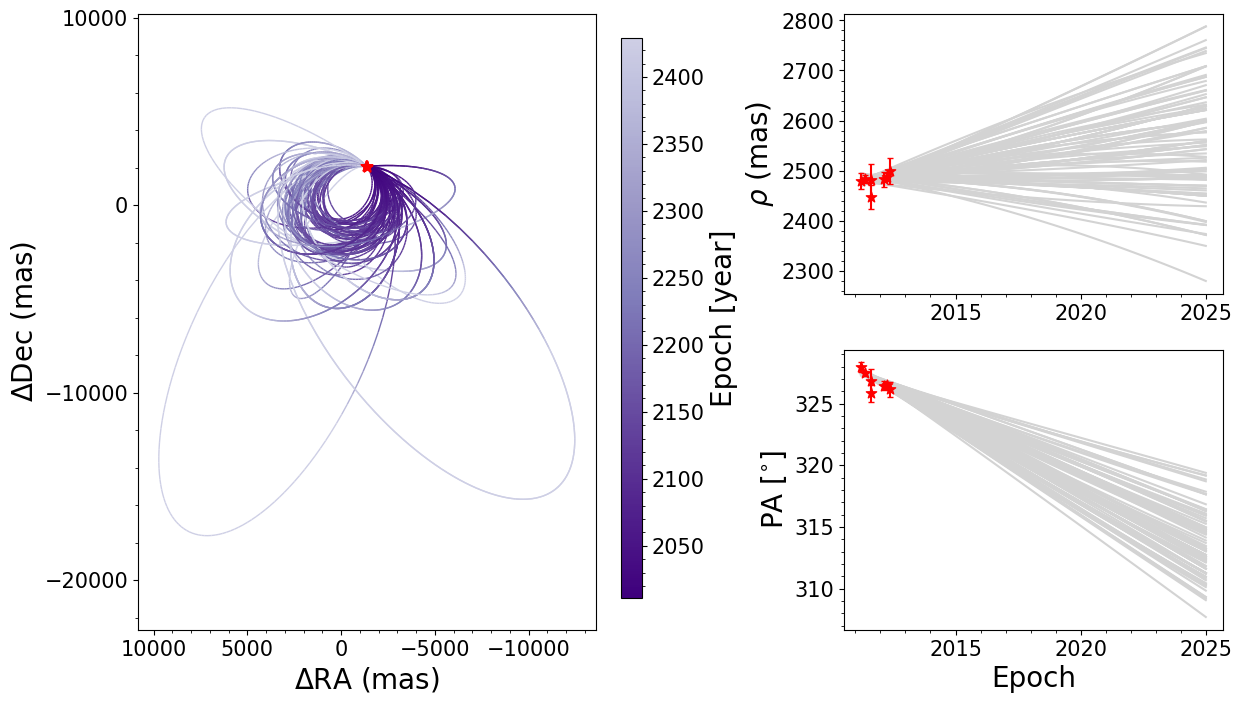

In [24]:
import orbitize.driver

### Let's go back to clasic plots style
plt.style.use("default")

### set up fit
myDriver = orbitize.driver.Driver(
    '{}/GJ504.csv'.format(orbitize.DATADIR),
    'OFTI', 1, 1.22, 56.95, mass_err=0.08, plx_err=0.26)
s = myDriver.sampler

### run orbitize!
orbits = s.run_sampler(100)
myResults = s.results

### make plot
epochs = myDriver.system.data_table['epoch']
orbit_figure = myResults.plot_orbits(start_mjd=epochs[0])


------
#### `Activity #2` 

We will now use `Pandas` to load a csv file and make some plots. 

1. Open the `M-Mbulge.csv` file inside `data`. This file contains a lits of elliptical galaxies, their K-band absolute magnitude `M_k` and the mass of the black hole and the center `M_bh`. This is from the [Kormendy & Ho (2013)](https://arxiv.org/pdf/1304.7762) paper
2. You will make a plot of `M_bh` vs `M_k` to observe any correlation between the black hole mass and the galaxy bulge magnitude/luminosity. Change the y-axis scale to log10 base.
3. The file also contanins error bars on the black hole mass: `low_Mbh` and `high_Mbh`. Add the error bars on the plot.
4. Finally also add a least square fit for this correlation 

$$\log \left(\frac{M_*}{10^9 M_{\odot}}\right)=-(0.265 \pm 0.050)-(0.488 \pm 0.033)\left(M_{K, \text { bulge }}+24.21\right)$$

5. Also indicate the spread in the fit using `fill_between` function. You should be getting a plot similar to the figure 17 in [Kormendy & Ho (2013)](https://arxiv.org/pdf/1304.7762). Play around with `rcParams` to make your plot look pretty.

6. Save this figure and paste your plots in [this Google Doc](https://docs.google.com/document/d/1KqO-EFO2PDdhoQN_A1_SivkQ8mpf5G4l2dAXELebvZ8/edit?usp=sharing) with your name and/or group number for everyone to admire!


----
-----

Final important point: Don't be afraid to read the documentations, they are `useful`.

Thanks for participating! 

![](imgs/matplotlib_meme.jpeg)

